# Importing Libraries


In [1]:
# Import OpenCV before using OpenCV functions
import cv2

In [2]:
# Check the version of OpenCV that is running
print(cv2.__version__)

4.7.0


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import io, os, reprlib, requests, sys, zipfile

# Configuring Visualization Parameters


In [5]:
%matplotlib inline

In [6]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [7]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": 0.8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters


In [8]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions


In [9]:
sys.path.append("../")

In [10]:
from Modules import *

# Downloading Images


In [11]:
# Download and unzip the image
if os.path.exists("../Images/") == False:
    request = requests.get(
        "https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip"
    )
    zipdata = zipfile.ZipFile(io.BytesIO(request.content))
    zipinfos = zipdata.infolist()
    for zipinfo in zipinfos:
        infos = list(zipinfo.filename.split("/"))
        if infos[0] != "__MACOSX" and infos[-1] != "":
            zipinfo.filename = infos[-1]
            zipdata.extract(zipinfo, "../Images/")

# Practicing in Stages

## Getting Started with OpenCV 4


In [12]:
# Load the image using `imread` specifying the image path
image = cv2.imread("../Images/flowers.jpeg")

tabulation = Form_Generator()
tabulation.heading_printer("Loading images via OpenCV")

statements = ['image = cv2.imread("../Images/flowers.jpeg")']
tabulation.statement_generator(statements)

variables = ["image"]
values = [str(reprlib_rules.repr(image))]
tabulation.variable_generator(variables, values)

expressions = ["image.shape"]
results = [str(image.shape)]
tabulation.expression_generator(expressions, results)

Loading images via OpenCV

    +----------------------------------------------+
    | Statement                                    |
    +----------------------------------------------+
    | image = cv2.imread("../Images/flowers.jpeg") |
    +----------------------------------------------+
    +----------+--------------------------------------+
    | Variable | Value                                |
    +----------+--------------------------------------+
    | image    | array([[[28, 62, 32],                |
    |          |         [28, 62, 32],                |
    |          |         [28, 62, 32],                |
    |          |         ...,                         |
    |          |         [13, 36, 28],                |
    |          |         [11, 34, 26],                |
    |          | ...39, 43],                          |
    |          |         [39, 38, 42],                |
    |          |         ...,                         |
    |          |         [14, 14, 20

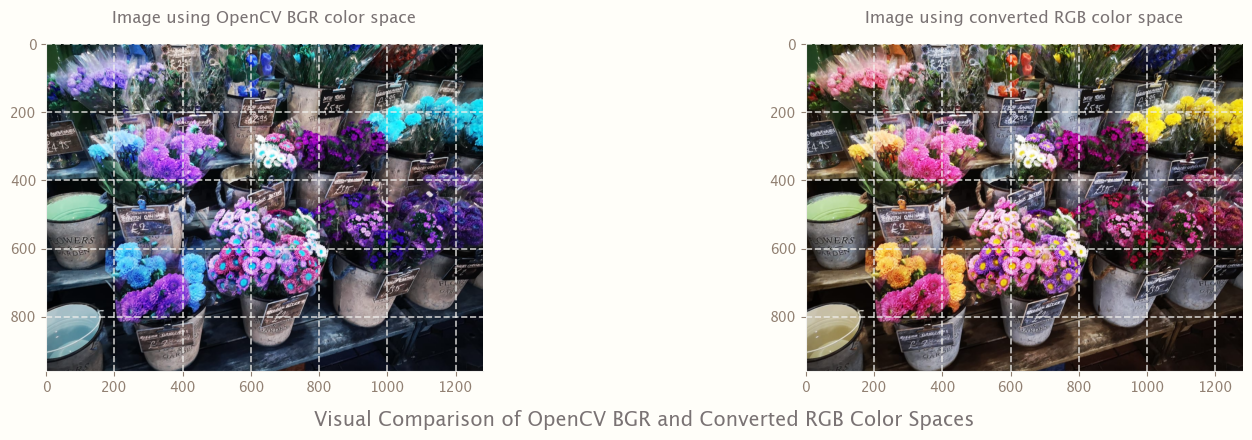

In [13]:
# Display the image using Matplotlib
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2)

fig, axs = plt.subplots(1, 2)


axs[0].imshow(image)
axs[0].set_title("Image using OpenCV BGR color space", loc="center", pad=15)

axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[1].set_title("Image using converted RGB color space", loc="center", pad=15)


fig.suptitle(
    "Visual Comparison of OpenCV BGR and Converted RGB Color Spaces",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

In [14]:
# Create a simple function to make displaying images simpler and easier
def imshow(title="", image=None):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)


tabulation = Form_Generator()
tabulation.heading_printer("Definition of picture display function")

definitions = [
    """
def imshow(title = "", image = None):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
"""
]
tabulation.definition_generator(definitions)

Definition of picture display function

    +--------------------------------------------------------+
    | Definition                                             |
    +--------------------------------------------------------+
    | def imshow(title = "", image = None):                  |
    |     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) |
    |     plt.title(title)                                   |
    +--------------------------------------------------------+


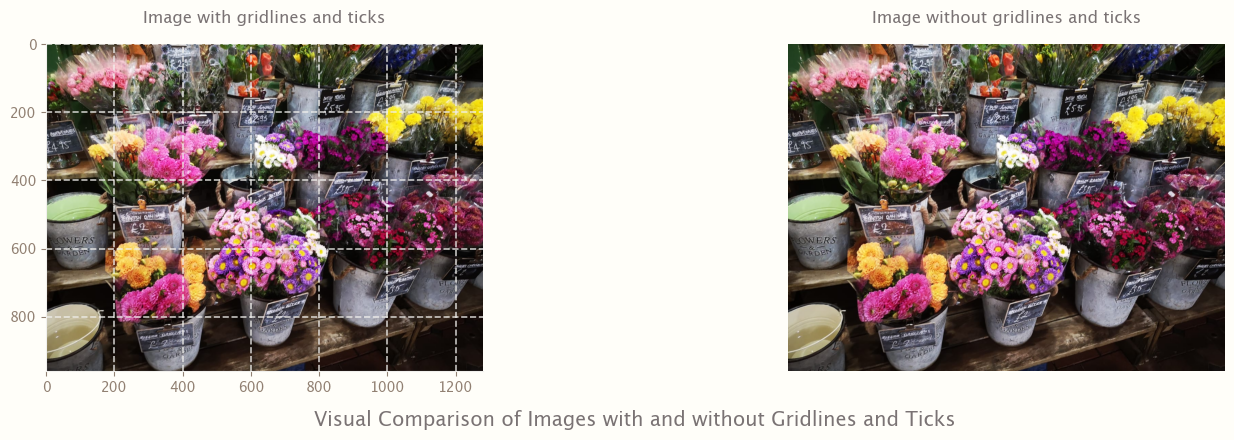

In [15]:
# Test the display effect with or without grid lines and ticks
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 2)

fig, axs = plt.subplots(1, 2)

plt.subplot(1, 2, 1)
imshow("Image with gridlines and ticks", image)

plt.subplot(1, 2, 2)
imshow("Image without gridlines and ticks", image)

for ax in axs.flat:
    ax.set_title(ax.get_title(), loc="center", pad=15)

axs[1].grid(False)
axs[1].set(xticks=[], yticks=[], frame_on=False)

fig.suptitle(
    "Visual Comparison of Images with and without Gridlines and Ticks",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

In [16]:
# Simply use `imwrite` to specify the filename and image to save
cv2.imwrite("output.jpg", image)

# Save the image as PNG (Portable Network Graphics), which is a lossless bitmap image format
cv2.imwrite("output.png", image)

tabulation = Form_Generator()
tabulation.heading_printer("Saving images via OpenCV")

statements = [
    """
cv2.imwrite("output.jpg", image)

cv2.imwrite("output.png", image)
"""
]
tabulation.statement_generator(statements)

Saving images via OpenCV

    +----------------------------------+
    | Statement                        |
    +----------------------------------+
    | cv2.imwrite("output.jpg", image) |
    |                                  |
    | cv2.imwrite("output.png", image) |
    +----------------------------------+


In [17]:
tabulation = Form_Generator()
tabulation.heading_printer("Displaying image dimensions")

# To access a dimension, simply index it with 0, 1 or 2
expressions = ["image.shape", "image.shape[0]", "image.shape[1]", "image.shape[2]"]
results = [
    str(image.shape),
    str(image.shape[0]),
    str(image.shape[1]),
    str(image.shape[2]),
]
tabulation.expression_generator(expressions, results)


dataframe = DataFrame_Generator("property", "dimension", "unit")
dataframe.updater("height", str(image.shape[0]), "pixel")
dataframe.updater("width", str(image.shape[1]), "pixel")
dataframe.updater("depth", str(image.shape[2]), "color component")

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Displaying image dimensions

    +----------------+----------------+
    | Expression     | Result         |
    +----------------+----------------+
    | image.shape    | (960, 1280, 3) |
    | image.shape[0] | 960            |
    | image.shape[1] | 1280           |
    | image.shape[2] | 3              |
    +----------------+----------------+
    +----+------------+-------------+-----------------+
    |    | property   |   dimension | unit            |
    |----+------------+-------------+-----------------|
    |  0 | height     |         960 | pixel           |
    |  1 | width      |        1280 | pixel           |
    |  2 | depth      |           3 | color component |
    +----+------------+-------------+-----------------+
